In [1]:
# tensorflow stuffs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# sklearn
from sklearn.base import BaseEstimator
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import loguniform

In [62]:
class ANN_classifier(BaseEstimator):
    def __init__(self, lr=0.001):
        self.lr = lr
        
    # needed for grid search
    def get_params(self, deep=True):
        return {"lr": self.lr}     
        
    # needed for grid search
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def build_model(self, lr=0.001):
        self.model = Sequential([
            Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'),
            Dense(1, activation='sigmoid')
        ])
        self.optimizer = SGD(learning_rate=lr, momentum=0.9)       
        self.model.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])

    # fit model
    def fit(self, X_train, Y_train, XY_valid=None, epochs=50):
        self.build_model(lr=self.lr)
        self.history = self.model.fit(X_train, Y_train,
                                      epochs=epochs,
                                      validation_data=XY_valid
                                      verbose=0)
        return self
                  
    def predict_proba(self, X):
        return self.model.predict(X)
    
    def predict(self, X):
        return (self.predict_proba(X)>=0.5).astype(int)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return f1_score(y_pred=y_pred, y_true=y)

# Make dummy dataset

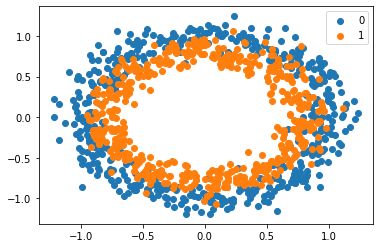

In [58]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
fig, ax = plt.subplots()
for i in range(2):
    samples_ix = np.where(y == i)
    ax.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
ax.legend()
plt.show()

In [59]:
# keep 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
model = ANN_classifier()

In [65]:
# distributions for hyperparameters
params = {
    "lr": loguniform(a=10**-4, b=10**-3)
}

In [66]:
# 10 random sampling of parameters, each tested through 5-fold cross-validation
search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=params,
    n_iter=10,
    cv=5
)

In [ ]:
CV = search.fit(X_train, y_train, epochs=200)

Epoch 1/200
20/20 [==============================] - 0s 725us/step - loss: 0.8002 - accuracy: 0.5031
Epoch 2/200
20/20 [==============================] - 0s 888us/step - loss: 0.7870 - accuracy: 0.5047
Epoch 3/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7728 - accuracy: 0.5016
Epoch 4/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7603 - accuracy: 0.5063
Epoch 5/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7499 - accuracy: 0.5063
Epoch 6/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7410 - accuracy: 0.5109
Epoch 7/200
20/20 [==============================] - 0s 931us/step - loss: 0.7337 - accuracy: 0.5109
Epoch 8/200
20/20 [==============================] - 0s 972us/step - loss: 0.7272 - accuracy: 0.5141
Epoch 9/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7219 - accuracy: 0.5141
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7171 - accuracy: 0.5078
E

20/20 [==============================] - 0s 784us/step - loss: 0.6674 - accuracy: 0.5297
Epoch 83/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.5297
Epoch 84/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.5297
Epoch 85/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.5297
Epoch 86/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.5297
Epoch 87/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6663 - accuracy: 0.5297
Epoch 88/200
20/20 [==============================] - 0s 925us/step - loss: 0.6659 - accuracy: 0.5297
Epoch 89/200
20/20 [==============================] - 0s 881us/step - loss: 0.6657 - accuracy: 0.5312
Epoch 90/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.5312
Epoch 91/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.5312
Epoch 9

Epoch 163/200
20/20 [==============================] - 0s 765us/step - loss: 0.6485 - accuracy: 0.6313
Epoch 164/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.6313
Epoch 165/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.6344
Epoch 166/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.6266
Epoch 167/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.6297
Epoch 168/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6313
Epoch 169/200
20/20 [==============================] - 0s 851us/step - loss: 0.6472 - accuracy: 0.6297
Epoch 170/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.6281
Epoch 171/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6466 - accuracy: 0.6281
Epoch 172/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6465 - acc

20/20 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5250
Epoch 45/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5266
Epoch 46/200
20/20 [==============================] - 0s 740us/step - loss: 0.6816 - accuracy: 0.5297
Epoch 47/200
20/20 [==============================] - 0s 978us/step - loss: 0.6812 - accuracy: 0.5219
Epoch 48/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5188
Epoch 49/200
20/20 [==============================] - 0s 984us/step - loss: 0.6804 - accuracy: 0.5172
Epoch 50/200
20/20 [==============================] - 0s 766us/step - loss: 0.6799 - accuracy: 0.5188
Epoch 51/200
20/20 [==============================] - 0s 749us/step - loss: 0.6795 - accuracy: 0.5188
Epoch 52/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5172
Epoch 53/200
20/20 [==============================] - 0s 707us/step - loss: 0.6788 - accuracy: 0.5172
E

20/20 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.5859
Epoch 126/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.5844
Epoch 127/200
20/20 [==============================] - 0s 824us/step - loss: 0.6584 - accuracy: 0.5859
Epoch 128/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.5859
Epoch 129/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.5859
Epoch 130/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.5875
Epoch 131/200
20/20 [==============================] - 0s 813us/step - loss: 0.6575 - accuracy: 0.5891
Epoch 132/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.5891
Epoch 133/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.5984
Epoch 134/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.6000


Epoch 6/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7765 - accuracy: 0.4922
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7598 - accuracy: 0.4906
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7450 - accuracy: 0.4859
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7335 - accuracy: 0.4875
Epoch 10/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7244 - accuracy: 0.4891
Epoch 11/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7167 - accuracy: 0.4859
Epoch 12/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7109 - accuracy: 0.4859
Epoch 13/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.4969
Epoch 14/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7023 - accuracy: 0.4891
Epoch 15/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.4859
Epoc

20/20 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.5844
Epoch 88/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5969
Epoch 89/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.5969
Epoch 90/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.5906
Epoch 91/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.5922
Epoch 92/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5906
Epoch 93/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.5984
Epoch 94/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.5922
Epoch 95/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.5953
Epoch 96/200
20/20 [==============================] - 0s 861us/step - loss: 0.6674 - accuracy: 0.6000
Epoch 97/20

20/20 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.6953
Epoch 169/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7000
Epoch 170/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.6969
Epoch 171/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6984
Epoch 172/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.7063
Epoch 173/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.7031
Epoch 174/200
20/20 [==============================] - 0s 810us/step - loss: 0.6494 - accuracy: 0.7000
Epoch 175/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.7125
Epoch 176/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.7078
Epoch 177/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.7078
Ep

20/20 [==============================] - 0s 885us/step - loss: 0.6713 - accuracy: 0.5391
Epoch 50/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6711 - accuracy: 0.5391
Epoch 51/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.5359
Epoch 52/200
20/20 [==============================] - 0s 749us/step - loss: 0.6705 - accuracy: 0.5375
Epoch 53/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.5391
Epoch 54/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.5391
Epoch 55/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.5406
Epoch 56/200
20/20 [==============================] - 0s 886us/step - loss: 0.6694 - accuracy: 0.5422
Epoch 57/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.5406
Epoch 58/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.5422
Epoch 5

20/20 [==============================] - 0s 743us/step - loss: 0.6507 - accuracy: 0.6203
Epoch 131/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6504 - accuracy: 0.6141
Epoch 132/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.6156
Epoch 133/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6172
Epoch 134/200
20/20 [==============================] - 0s 868us/step - loss: 0.6497 - accuracy: 0.6250
Epoch 135/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.6250
Epoch 136/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.6266
Epoch 137/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.6234
Epoch 138/200
20/20 [==============================] - 0s 758us/step - loss: 0.6488 - accuracy: 0.6172
Epoch 139/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.621

20/20 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5078
Epoch 11/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5016
Epoch 12/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.4969
Epoch 13/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5109
Epoch 14/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5078
Epoch 15/200
20/20 [==============================] - 0s 842us/step - loss: 0.6880 - accuracy: 0.5016
Epoch 16/200
20/20 [==============================] - 0s 863us/step - loss: 0.6878 - accuracy: 0.5063
Epoch 17/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5047
Epoch 18/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5031
Epoch 19/200
20/20 [==============================] - 0s 742us/step - loss: 0.6866 - accuracy: 0.5000
Epoch 2

20/20 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.5578
Epoch 92/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.5531
Epoch 93/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.5547
Epoch 94/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.5594
Epoch 95/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.5578
Epoch 96/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.5594
Epoch 97/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.5656
Epoch 98/200
20/20 [==============================] - 0s 846us/step - loss: 0.6669 - accuracy: 0.5625
Epoch 99/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.5609
Epoch 100/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.5625
Epoch 101/

20/20 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6453
Epoch 172/200
20/20 [==============================] - 0s 733us/step - loss: 0.6498 - accuracy: 0.6438
Epoch 173/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6391
Epoch 174/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6438
Epoch 175/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6453
Epoch 176/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.6516
Epoch 177/200
20/20 [==============================] - 0s 793us/step - loss: 0.6488 - accuracy: 0.6469
Epoch 178/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.6453
Epoch 179/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.6547
Epoch 180/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.6484


20/20 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4891
Epoch 53/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4891
Epoch 54/200
20/20 [==============================] - 0s 808us/step - loss: 0.6949 - accuracy: 0.4875
Epoch 55/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4875
Epoch 56/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4828
Epoch 57/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4797
Epoch 58/200
20/20 [==============================] - 0s 843us/step - loss: 0.6937 - accuracy: 0.4781
Epoch 59/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4859
Epoch 60/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4891
Epoch 61/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.4922
Epoch 62/

20/20 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.5156
Epoch 134/200
20/20 [==============================] - 0s 826us/step - loss: 0.6773 - accuracy: 0.5125
Epoch 135/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5125
Epoch 136/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5125
Epoch 137/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5141
Epoch 138/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5156
Epoch 139/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5141
Epoch 140/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.5141
Epoch 141/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.5141
Epoch 142/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.5141
Ep

Epoch 14/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7096 - accuracy: 0.5078
Epoch 15/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7074 - accuracy: 0.5109
Epoch 16/200
20/20 [==============================] - 0s 891us/step - loss: 0.7055 - accuracy: 0.5141
Epoch 17/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.5094
Epoch 18/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.5047
Epoch 19/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7013 - accuracy: 0.4984
Epoch 20/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7003 - accuracy: 0.5016
Epoch 21/200
20/20 [==============================] - 0s 824us/step - loss: 0.6994 - accuracy: 0.4969
Epoch 22/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.4984
Epoch 23/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5

20/20 [==============================] - 0s 681us/step - loss: 0.6778 - accuracy: 0.5422
Epoch 96/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5422
Epoch 97/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.5422
Epoch 98/200
20/20 [==============================] - 0s 777us/step - loss: 0.6773 - accuracy: 0.5406
Epoch 99/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5422
Epoch 100/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5484
Epoch 101/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.5453
Epoch 102/200
20/20 [==============================] - 0s 799us/step - loss: 0.6766 - accuracy: 0.5422
Epoch 103/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5453
Epoch 104/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5437
Ep

20/20 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.5750
Epoch 176/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.5734
Epoch 177/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.5719
Epoch 178/200
20/20 [==============================] - 0s 832us/step - loss: 0.6636 - accuracy: 0.5734
Epoch 179/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.5766
Epoch 180/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5797
Epoch 181/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.5797
Epoch 182/200
20/20 [==============================] - 0s 822us/step - loss: 0.6629 - accuracy: 0.5781
Epoch 183/200
20/20 [==============================] - 0s 957us/step - loss: 0.6627 - accuracy: 0.5813
Epoch 184/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.581

20/20 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5562
Epoch 57/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.5500
Epoch 58/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5484
Epoch 59/200
20/20 [==============================] - 0s 753us/step - loss: 0.6789 - accuracy: 0.5484
Epoch 60/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5484
Epoch 61/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5469
Epoch 62/200
20/20 [==============================] - 0s 693us/step - loss: 0.6784 - accuracy: 0.5469
Epoch 63/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.5516
Epoch 64/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.5531
Epoch 65/200
20/20 [==============================] - 0s 803us/step - loss: 0.6780 - accuracy: 0.5516
Epoch 6

20/20 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.6016
Epoch 138/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.6016
Epoch 139/200
20/20 [==============================] - 0s 762us/step - loss: 0.6662 - accuracy: 0.6031
Epoch 140/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.6047
Epoch 141/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.6047
Epoch 142/200
20/20 [==============================] - 0s 877us/step - loss: 0.6657 - accuracy: 0.6047
Epoch 143/200
20/20 [==============================] - 0s 985us/step - loss: 0.6655 - accuracy: 0.6062
Epoch 144/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.6078
Epoch 145/200
20/20 [==============================] - 0s 755us/step - loss: 0.6654 - accuracy: 0.6062
Epoch 146/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6651 - accuracy: 0.6

20/20 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5031
Epoch 18/200
20/20 [==============================] - 0s 841us/step - loss: 0.6976 - accuracy: 0.5031
Epoch 19/200
20/20 [==============================] - 0s 982us/step - loss: 0.6972 - accuracy: 0.5031
Epoch 20/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.5016
Epoch 21/200
20/20 [==============================] - 0s 989us/step - loss: 0.6962 - accuracy: 0.5000
Epoch 22/200
20/20 [==============================] - 0s 935us/step - loss: 0.6958 - accuracy: 0.5000
Epoch 23/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4984
Epoch 24/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4969
Epoch 25/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 26/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5031
Epoch

20/20 [==============================] - 0s 947us/step - loss: 0.6771 - accuracy: 0.5156
Epoch 99/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5172
Epoch 100/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5188
Epoch 101/200
20/20 [==============================] - 0s 833us/step - loss: 0.6765 - accuracy: 0.5188
Epoch 102/200
20/20 [==============================] - 0s 809us/step - loss: 0.6763 - accuracy: 0.5188
Epoch 103/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.5203
Epoch 104/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.5203
Epoch 105/200
20/20 [==============================] - 0s 845us/step - loss: 0.6758 - accuracy: 0.5219
Epoch 106/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.5219
Epoch 107/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.52

20/20 [==============================] - 0s 764us/step - loss: 0.6636 - accuracy: 0.5422
Epoch 179/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.5406
Epoch 180/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.5422
Epoch 181/200
20/20 [==============================] - 0s 772us/step - loss: 0.6631 - accuracy: 0.5422
Epoch 182/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.5422
Epoch 183/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6628 - accuracy: 0.5391
Epoch 184/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.5406
Epoch 185/200
20/20 [==============================] - 0s 854us/step - loss: 0.6625 - accuracy: 0.5406
Epoch 186/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.5500
Epoch 187/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.546

20/20 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5203
Epoch 60/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5188
Epoch 61/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5188
Epoch 62/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5188
Epoch 63/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5188
Epoch 64/200
20/20 [==============================] - 0s 972us/step - loss: 0.6852 - accuracy: 0.5172
Epoch 65/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5172
Epoch 66/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5203
Epoch 67/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5203
Epoch 68/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5219
Epoch 69/20

20/20 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.5875
Epoch 141/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.5906
Epoch 142/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.5922
Epoch 143/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.5953
Epoch 144/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.5922
Epoch 145/200
20/20 [==============================] - 0s 815us/step - loss: 0.6658 - accuracy: 0.5969
Epoch 146/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.5938
Epoch 147/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.5969
Epoch 148/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.5969
Epoch 149/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6000
Ep

20/20 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5016
Epoch 21/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5063
Epoch 22/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5078
Epoch 23/200
20/20 [==============================] - 0s 986us/step - loss: 0.6890 - accuracy: 0.5047
Epoch 24/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5063
Epoch 25/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5063
Epoch 26/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5078
Epoch 27/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5063
Epoch 28/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5109
Epoch 29/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5109
Epoch 30/20

20/20 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.5188
Epoch 102/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5188
Epoch 103/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.5188
Epoch 104/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.5188
Epoch 105/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.5188
Epoch 106/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.5188
Epoch 107/200
20/20 [==============================] - 0s 957us/step - loss: 0.6694 - accuracy: 0.5188
Epoch 108/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.5188
Epoch 109/200
20/20 [==============================] - 0s 799us/step - loss: 0.6691 - accuracy: 0.5188
Epoch 110/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5188


Epoch 182/200
20/20 [==============================] - 0s 810us/step - loss: 0.6604 - accuracy: 0.5344
Epoch 183/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.5344
Epoch 184/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.5359
Epoch 185/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.5359
Epoch 186/200
20/20 [==============================] - 0s 794us/step - loss: 0.6600 - accuracy: 0.5359
Epoch 187/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.5359
Epoch 188/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.5359
Epoch 189/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6596 - accuracy: 0.5359
Epoch 190/200
20/20 [==============================] - 0s 833us/step - loss: 0.6596 - accuracy: 0.5375
Epoch 191/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6595 - a

20/20 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5344
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5312
Epoch 65/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5312
Epoch 66/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5312
Epoch 67/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5328
Epoch 68/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5359
Epoch 69/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5359
Epoch 70/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5375
Epoch 71/200
20/20 [==============================] - 0s 833us/step - loss: 0.6804 - accuracy: 0.5406
Epoch 72/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5437
Epoch 73/20

20/20 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5891
Epoch 145/200
20/20 [==============================] - 0s 998us/step - loss: 0.6684 - accuracy: 0.5906
Epoch 146/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.5906
Epoch 147/200
20/20 [==============================] - 0s 754us/step - loss: 0.6681 - accuracy: 0.5906
Epoch 148/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.5922
Epoch 149/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.5953
Epoch 150/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.5938
Epoch 151/200
20/20 [==============================] - 0s 829us/step - loss: 0.6676 - accuracy: 0.6000
Epoch 152/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.5984
Epoch 153/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.598

20/20 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5063
Epoch 26/200
20/20 [==============================] - 0s 741us/step - loss: 0.6938 - accuracy: 0.5047
Epoch 27/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5031
Epoch 28/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5031
Epoch 29/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5031
Epoch 30/200
20/20 [==============================] - 0s 795us/step - loss: 0.6927 - accuracy: 0.5047
Epoch 31/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5063
Epoch 32/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5047
Epoch 33/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5031
Epoch 34/200
20/20 [==============================] - 0s 861us/step - loss: 0.6919 - accuracy: 0.5047
Epoch 3

20/20 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5359
Epoch 107/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5359
Epoch 108/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5312
Epoch 109/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5328
Epoch 110/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.5359
Epoch 111/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5359
Epoch 112/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5359
Epoch 113/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5375
Epoch 114/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5391
Epoch 115/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5406
Epoc

20/20 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.5688
Epoch 187/200
20/20 [==============================] - 0s 718us/step - loss: 0.6724 - accuracy: 0.5703
Epoch 188/200
20/20 [==============================] - 0s 854us/step - loss: 0.6723 - accuracy: 0.5672
Epoch 189/200
20/20 [==============================] - 0s 823us/step - loss: 0.6722 - accuracy: 0.5703
Epoch 190/200
20/20 [==============================] - 0s 884us/step - loss: 0.6721 - accuracy: 0.5688
Epoch 191/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5734
Epoch 192/200
20/20 [==============================] - 0s 776us/step - loss: 0.6719 - accuracy: 0.5797
Epoch 193/200
20/20 [==============================] - 0s 737us/step - loss: 0.6717 - accuracy: 0.5734
Epoch 194/200
20/20 [==============================] - 0s 749us/step - loss: 0.6716 - accuracy: 0.5703
Epoch 195/200
20/20 [==============================] - 0s 893us/step - loss: 0.6715 - accur

20/20 [==============================] - 0s 871us/step - loss: 0.6933 - accuracy: 0.5047
Epoch 67/200
20/20 [==============================] - 0s 733us/step - loss: 0.6930 - accuracy: 0.5047
Epoch 68/200
20/20 [==============================] - 0s 798us/step - loss: 0.6927 - accuracy: 0.5047
Epoch 69/200
20/20 [==============================] - 0s 901us/step - loss: 0.6926 - accuracy: 0.5063
Epoch 70/200
20/20 [==============================] - 0s 738us/step - loss: 0.6923 - accuracy: 0.5063
Epoch 71/200
20/20 [==============================] - 0s 739us/step - loss: 0.6922 - accuracy: 0.5063
Epoch 72/200
20/20 [==============================] - 0s 797us/step - loss: 0.6920 - accuracy: 0.5063
Epoch 73/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5094
Epoch 74/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5109
Epoch 75/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5109

20/20 [==============================] - 0s 756us/step - loss: 0.6809 - accuracy: 0.5188
Epoch 147/200
20/20 [==============================] - 0s 682us/step - loss: 0.6807 - accuracy: 0.5188
Epoch 148/200
20/20 [==============================] - 0s 874us/step - loss: 0.6807 - accuracy: 0.5188
Epoch 149/200
20/20 [==============================] - 0s 833us/step - loss: 0.6805 - accuracy: 0.5203
Epoch 150/200
20/20 [==============================] - 0s 770us/step - loss: 0.6803 - accuracy: 0.5203
Epoch 151/200
20/20 [==============================] - 0s 904us/step - loss: 0.6802 - accuracy: 0.5203
Epoch 152/200
20/20 [==============================] - 0s 828us/step - loss: 0.6801 - accuracy: 0.5219
Epoch 153/200
20/20 [==============================] - 0s 867us/step - loss: 0.6800 - accuracy: 0.5234
Epoch 154/200
20/20 [==============================] - 0s 715us/step - loss: 0.6799 - accuracy: 0.5234
Epoch 155/200
20/20 [==============================] - 0s 729us/step - loss: 0.6797 - a

20/20 [==============================] - 0s 951us/step - loss: 0.6940 - accuracy: 0.4984
Epoch 27/200
20/20 [==============================] - 0s 863us/step - loss: 0.6928 - accuracy: 0.5000
Epoch 28/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5016
Epoch 29/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5031
Epoch 30/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5031
Epoch 31/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5031
Epoch 32/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5047
Epoch 33/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5047
Epoch 34/200
20/20 [==============================] - 0s 771us/step - loss: 0.6869 - accuracy: 0.5078
Epoch 35/200
20/20 [==============================] - 0s 823us/step - loss: 0.6863 - accuracy: 0.5078
Epoch

20/20 [==============================] - 0s 956us/step - loss: 0.6704 - accuracy: 0.5906
Epoch 107/200
20/20 [==============================] - 0s 705us/step - loss: 0.6704 - accuracy: 0.5938
Epoch 108/200
20/20 [==============================] - 0s 656us/step - loss: 0.6701 - accuracy: 0.5938
Epoch 109/200
20/20 [==============================] - 0s 723us/step - loss: 0.6700 - accuracy: 0.5984
Epoch 110/200
20/20 [==============================] - 0s 744us/step - loss: 0.6699 - accuracy: 0.5984
Epoch 111/200
20/20 [==============================] - 0s 750us/step - loss: 0.6699 - accuracy: 0.5984
Epoch 112/200
20/20 [==============================] - 0s 821us/step - loss: 0.6698 - accuracy: 0.5984
Epoch 113/200
20/20 [==============================] - 0s 749us/step - loss: 0.6695 - accuracy: 0.5969
Epoch 114/200
20/20 [==============================] - 0s 744us/step - loss: 0.6694 - accuracy: 0.5969
Epoch 115/200
20/20 [==============================] - 0s 807us/step - loss: 0.6694 - a

20/20 [==============================] - 0s 820us/step - loss: 0.6610 - accuracy: 0.6203
Epoch 186/200
20/20 [==============================] - 0s 766us/step - loss: 0.6609 - accuracy: 0.6203
Epoch 187/200
20/20 [==============================] - 0s 676us/step - loss: 0.6608 - accuracy: 0.6203
Epoch 188/200
20/20 [==============================] - 0s 646us/step - loss: 0.6607 - accuracy: 0.6203
Epoch 189/200
20/20 [==============================] - 0s 695us/step - loss: 0.6606 - accuracy: 0.6219
Epoch 190/200
20/20 [==============================] - 0s 832us/step - loss: 0.6604 - accuracy: 0.6234
Epoch 191/200
20/20 [==============================] - 0s 848us/step - loss: 0.6603 - accuracy: 0.6219
Epoch 192/200
20/20 [==============================] - 0s 819us/step - loss: 0.6603 - accuracy: 0.6203
Epoch 193/200
20/20 [==============================] - 0s 924us/step - loss: 0.6601 - accuracy: 0.6219
Epoch 194/200
20/20 [==============================] - 0s 793us/step - loss: 0.6601 - a

20/20 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.5891
Epoch 66/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6000
Epoch 67/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.5938
Epoch 68/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.5969
Epoch 69/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.6078
Epoch 70/200
20/20 [==============================] - 0s 981us/step - loss: 0.6510 - accuracy: 0.6047
Epoch 71/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6504 - accuracy: 0.6156
Epoch 72/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6062
Epoch 73/200
20/20 [==============================] - 0s 971us/step - loss: 0.6491 - accuracy: 0.6078
Epoch 74/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.6125
Epoch 75/

20/20 [==============================] - 0s 951us/step - loss: 0.6088 - accuracy: 0.7672
Epoch 146/200
20/20 [==============================] - 0s 913us/step - loss: 0.6083 - accuracy: 0.7688
Epoch 147/200
20/20 [==============================] - 0s 789us/step - loss: 0.6077 - accuracy: 0.7656
Epoch 148/200
20/20 [==============================] - 0s 778us/step - loss: 0.6073 - accuracy: 0.7656
Epoch 149/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6067 - accuracy: 0.7719
Epoch 150/200
20/20 [==============================] - 0s 812us/step - loss: 0.6061 - accuracy: 0.7625
Epoch 151/200
20/20 [==============================] - 0s 772us/step - loss: 0.6055 - accuracy: 0.7563
Epoch 152/200
20/20 [==============================] - 0s 805us/step - loss: 0.6049 - accuracy: 0.7703
Epoch 153/200
20/20 [==============================] - 0s 841us/step - loss: 0.6044 - accuracy: 0.7688
Epoch 154/200
20/20 [==============================] - 0s 868us/step - loss: 0.6040 - acc

20/20 [==============================] - 0s 891us/step - loss: 0.6697 - accuracy: 0.5797
Epoch 26/200
20/20 [==============================] - 0s 736us/step - loss: 0.6692 - accuracy: 0.5797
Epoch 27/200
20/20 [==============================] - 0s 917us/step - loss: 0.6687 - accuracy: 0.5750
Epoch 28/200
20/20 [==============================] - 0s 983us/step - loss: 0.6681 - accuracy: 0.5734
Epoch 29/200
20/20 [==============================] - 0s 766us/step - loss: 0.6672 - accuracy: 0.5828
Epoch 30/200
20/20 [==============================] - 0s 917us/step - loss: 0.6665 - accuracy: 0.5875
Epoch 31/200
20/20 [==============================] - 0s 901us/step - loss: 0.6659 - accuracy: 0.5906
Epoch 32/200
20/20 [==============================] - 0s 854us/step - loss: 0.6653 - accuracy: 0.5813
Epoch 33/200
20/20 [==============================] - 0s 851us/step - loss: 0.6651 - accuracy: 0.5938
Epoch 34/200
20/20 [==============================] - 0s 925us/step - loss: 0.6640 - accuracy: 

20/20 [==============================] - 0s 767us/step - loss: 0.6250 - accuracy: 0.7078
Epoch 106/200
20/20 [==============================] - 0s 782us/step - loss: 0.6244 - accuracy: 0.7109
Epoch 107/200
20/20 [==============================] - 0s 748us/step - loss: 0.6240 - accuracy: 0.7109
Epoch 108/200
20/20 [==============================] - 0s 784us/step - loss: 0.6234 - accuracy: 0.7094
Epoch 109/200
20/20 [==============================] - 0s 828us/step - loss: 0.6230 - accuracy: 0.7125
Epoch 110/200
20/20 [==============================] - 0s 912us/step - loss: 0.6225 - accuracy: 0.7156
Epoch 111/200
20/20 [==============================] - 0s 766us/step - loss: 0.6220 - accuracy: 0.7125
Epoch 112/200
20/20 [==============================] - 0s 902us/step - loss: 0.6216 - accuracy: 0.7125
Epoch 113/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6209 - accuracy: 0.7203
Epoch 114/200
20/20 [==============================] - 0s 667us/step - loss: 0.6205 - acc

20/20 [==============================] - 0s 994us/step - loss: 0.5873 - accuracy: 0.7688
Epoch 185/200
20/20 [==============================] - 0s 1ms/step - loss: 0.5864 - accuracy: 0.7703
Epoch 186/200
20/20 [==============================] - 0s 764us/step - loss: 0.5859 - accuracy: 0.7719
Epoch 187/200
20/20 [==============================] - 0s 732us/step - loss: 0.5854 - accuracy: 0.7688
Epoch 188/200
20/20 [==============================] - 0s 737us/step - loss: 0.5851 - accuracy: 0.7734
Epoch 189/200
20/20 [==============================] - 0s 766us/step - loss: 0.5847 - accuracy: 0.7797
Epoch 190/200
20/20 [==============================] - 0s 735us/step - loss: 0.5841 - accuracy: 0.7797
Epoch 191/200
20/20 [==============================] - 0s 732us/step - loss: 0.5835 - accuracy: 0.7781
Epoch 192/200
20/20 [==============================] - 0s 811us/step - loss: 0.5831 - accuracy: 0.7766
Epoch 193/200
20/20 [==============================] - 0s 754us/step - loss: 0.5826 - acc

20/20 [==============================] - 0s 739us/step - loss: 0.6525 - accuracy: 0.6922
Epoch 65/200
20/20 [==============================] - 0s 662us/step - loss: 0.6519 - accuracy: 0.7094
Epoch 66/200
20/20 [==============================] - 0s 811us/step - loss: 0.6513 - accuracy: 0.6969
Epoch 67/200
20/20 [==============================] - 0s 746us/step - loss: 0.6508 - accuracy: 0.6953
Epoch 68/200
20/20 [==============================] - 0s 810us/step - loss: 0.6499 - accuracy: 0.6984
Epoch 69/200
20/20 [==============================] - 0s 745us/step - loss: 0.6496 - accuracy: 0.7141
Epoch 70/200
20/20 [==============================] - 0s 690us/step - loss: 0.6490 - accuracy: 0.7281
Epoch 71/200
20/20 [==============================] - 0s 818us/step - loss: 0.6483 - accuracy: 0.7016
Epoch 72/200
20/20 [==============================] - 0s 767us/step - loss: 0.6475 - accuracy: 0.7063
Epoch 73/200
20/20 [==============================] - 0s 749us/step - loss: 0.6473 - accuracy: 

20/20 [==============================] - 0s 834us/step - loss: 0.6076 - accuracy: 0.7875
Epoch 145/200
20/20 [==============================] - 0s 889us/step - loss: 0.6070 - accuracy: 0.7891
Epoch 146/200
20/20 [==============================] - 0s 731us/step - loss: 0.6066 - accuracy: 0.7906
Epoch 147/200
20/20 [==============================] - 0s 776us/step - loss: 0.6060 - accuracy: 0.7875
Epoch 148/200
20/20 [==============================] - 0s 859us/step - loss: 0.6055 - accuracy: 0.7891
Epoch 149/200
20/20 [==============================] - 0s 819us/step - loss: 0.6051 - accuracy: 0.7875
Epoch 150/200
20/20 [==============================] - 0s 781us/step - loss: 0.6045 - accuracy: 0.7906
Epoch 151/200
20/20 [==============================] - 0s 921us/step - loss: 0.6039 - accuracy: 0.7937
Epoch 152/200
20/20 [==============================] - 0s 918us/step - loss: 0.6034 - accuracy: 0.7984
Epoch 153/200
20/20 [==============================] - 0s 807us/step - loss: 0.6031 - a

20/20 [==============================] - 0s 789us/step - loss: 0.6723 - accuracy: 0.5484
Epoch 25/200
20/20 [==============================] - 0s 900us/step - loss: 0.6712 - accuracy: 0.5375
Epoch 26/200
20/20 [==============================] - 0s 783us/step - loss: 0.6706 - accuracy: 0.5281
Epoch 27/200
20/20 [==============================] - 0s 853us/step - loss: 0.6699 - accuracy: 0.5312
Epoch 28/200
20/20 [==============================] - 0s 929us/step - loss: 0.6689 - accuracy: 0.5266
Epoch 29/200
20/20 [==============================] - 0s 806us/step - loss: 0.6682 - accuracy: 0.5203
Epoch 30/200
20/20 [==============================] - 0s 926us/step - loss: 0.6674 - accuracy: 0.5203
Epoch 31/200
20/20 [==============================] - 0s 800us/step - loss: 0.6670 - accuracy: 0.5250
Epoch 32/200
20/20 [==============================] - 0s 974us/step - loss: 0.6660 - accuracy: 0.5219
Epoch 33/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.

20/20 [==============================] - 0s 798us/step - loss: 0.6254 - accuracy: 0.7188
Epoch 105/200
20/20 [==============================] - 0s 895us/step - loss: 0.6250 - accuracy: 0.7188
Epoch 106/200
20/20 [==============================] - 0s 736us/step - loss: 0.6244 - accuracy: 0.7063
Epoch 107/200
20/20 [==============================] - 0s 803us/step - loss: 0.6239 - accuracy: 0.7078
Epoch 108/200
20/20 [==============================] - 0s 887us/step - loss: 0.6234 - accuracy: 0.7203
Epoch 109/200
20/20 [==============================] - 0s 678us/step - loss: 0.6228 - accuracy: 0.7188
Epoch 110/200
20/20 [==============================] - 0s 786us/step - loss: 0.6223 - accuracy: 0.7141
Epoch 111/200
20/20 [==============================] - 0s 760us/step - loss: 0.6219 - accuracy: 0.7125
Epoch 112/200
20/20 [==============================] - 0s 915us/step - loss: 0.6212 - accuracy: 0.7188
Epoch 113/200
20/20 [==============================] - 0s 683us/step - loss: 0.6209 - a

20/20 [==============================] - 0s 750us/step - loss: 0.5828 - accuracy: 0.7891
Epoch 184/200
20/20 [==============================] - 0s 778us/step - loss: 0.5826 - accuracy: 0.7969
Epoch 185/200
20/20 [==============================] - 0s 765us/step - loss: 0.5817 - accuracy: 0.7953
Epoch 186/200
20/20 [==============================] - 0s 880us/step - loss: 0.5816 - accuracy: 0.7906
Epoch 187/200
20/20 [==============================] - 0s 978us/step - loss: 0.5810 - accuracy: 0.7984
Epoch 188/200
20/20 [==============================] - 0s 790us/step - loss: 0.5802 - accuracy: 0.8016
Epoch 189/200
20/20 [==============================] - 0s 781us/step - loss: 0.5797 - accuracy: 0.8000
Epoch 190/200
20/20 [==============================] - 0s 878us/step - loss: 0.5792 - accuracy: 0.7969
Epoch 191/200
20/20 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.7984
Epoch 192/200
20/20 [==============================] - 0s 965us/step - loss: 0.5784 - acc

20/20 [==============================] - 0s 837us/step - loss: 0.6490 - accuracy: 0.6734
Epoch 64/200
20/20 [==============================] - 0s 894us/step - loss: 0.6483 - accuracy: 0.6875
Epoch 65/200
20/20 [==============================] - 0s 752us/step - loss: 0.6477 - accuracy: 0.6844
Epoch 66/200
20/20 [==============================] - 0s 859us/step - loss: 0.6471 - accuracy: 0.6844
Epoch 67/200
20/20 [==============================] - 0s 803us/step - loss: 0.6465 - accuracy: 0.6844
Epoch 68/200
20/20 [==============================] - 0s 788us/step - loss: 0.6460 - accuracy: 0.6906
Epoch 69/200
20/20 [==============================] - 0s 835us/step - loss: 0.6453 - accuracy: 0.6859
Epoch 70/200
20/20 [==============================] - 0s 766us/step - loss: 0.6448 - accuracy: 0.6859
Epoch 71/200
20/20 [==============================] - 0s 912us/step - loss: 0.6441 - accuracy: 0.6953
Epoch 72/200
20/20 [==============================] - 0s 769us/step - loss: 0.6436 - accuracy: 

20/20 [==============================] - 0s 929us/step - loss: 0.6043 - accuracy: 0.7766
Epoch 144/200
20/20 [==============================] - 0s 723us/step - loss: 0.6037 - accuracy: 0.7797
Epoch 145/200
20/20 [==============================] - 0s 815us/step - loss: 0.6029 - accuracy: 0.7844
Epoch 146/200
20/20 [==============================] - 0s 792us/step - loss: 0.6028 - accuracy: 0.7969
Epoch 147/200
20/20 [==============================] - 0s 865us/step - loss: 0.6022 - accuracy: 0.7906
Epoch 148/200
20/20 [==============================] - 0s 714us/step - loss: 0.6015 - accuracy: 0.7875
Epoch 149/200
20/20 [==============================] - 0s 915us/step - loss: 0.6010 - accuracy: 0.7875
Epoch 150/200
20/20 [==============================] - 0s 916us/step - loss: 0.6005 - accuracy: 0.7906
Epoch 151/200
20/20 [==============================] - 0s 802us/step - loss: 0.6000 - accuracy: 0.7906
Epoch 152/200
20/20 [==============================] - 0s 870us/step - loss: 0.5994 - a

20/20 [==============================] - 0s 901us/step - loss: 0.6999 - accuracy: 0.5016
Epoch 24/200
20/20 [==============================] - 0s 746us/step - loss: 0.6986 - accuracy: 0.5047
Epoch 25/200
20/20 [==============================] - 0s 903us/step - loss: 0.6975 - accuracy: 0.5047
Epoch 26/200
20/20 [==============================] - 0s 880us/step - loss: 0.6965 - accuracy: 0.5031
Epoch 27/200
20/20 [==============================] - 0s 794us/step - loss: 0.6955 - accuracy: 0.5000
Epoch 28/200
20/20 [==============================] - 0s 852us/step - loss: 0.6948 - accuracy: 0.5016
Epoch 29/200
20/20 [==============================] - 0s 900us/step - loss: 0.6939 - accuracy: 0.5000
Epoch 30/200
20/20 [==============================] - 0s 953us/step - loss: 0.6934 - accuracy: 0.4969
Epoch 31/200
20/20 [==============================] - 0s 911us/step - loss: 0.6926 - accuracy: 0.4969
Epoch 32/200
20/20 [==============================] - 0s 954us/step - loss: 0.6922 - accuracy: 

20/20 [==============================] - 0s 646us/step - loss: 0.6780 - accuracy: 0.5125
Epoch 104/200
20/20 [==============================] - 0s 835us/step - loss: 0.6779 - accuracy: 0.5125
Epoch 105/200
20/20 [==============================] - 0s 823us/step - loss: 0.6777 - accuracy: 0.5125
Epoch 106/200
20/20 [==============================] - 0s 833us/step - loss: 0.6777 - accuracy: 0.5125
Epoch 107/200
20/20 [==============================] - 0s 692us/step - loss: 0.6775 - accuracy: 0.5125
Epoch 108/200
20/20 [==============================] - 0s 785us/step - loss: 0.6774 - accuracy: 0.5125
Epoch 109/200
20/20 [==============================] - 0s 900us/step - loss: 0.6773 - accuracy: 0.5125
Epoch 110/200
20/20 [==============================] - 0s 905us/step - loss: 0.6772 - accuracy: 0.5125
Epoch 111/200
20/20 [==============================] - 0s 864us/step - loss: 0.6770 - accuracy: 0.5125
Epoch 112/200
20/20 [==============================] - 0s 789us/step - loss: 0.6769 - a

20/20 [==============================] - 0s 885us/step - loss: 0.6689 - accuracy: 0.5328
Epoch 183/200
20/20 [==============================] - 0s 847us/step - loss: 0.6687 - accuracy: 0.5328
Epoch 184/200
20/20 [==============================] - 0s 860us/step - loss: 0.6686 - accuracy: 0.5312
Epoch 185/200
20/20 [==============================] - 0s 752us/step - loss: 0.6685 - accuracy: 0.5344
Epoch 186/200
20/20 [==============================] - 0s 789us/step - loss: 0.6685 - accuracy: 0.5359
Epoch 187/200
20/20 [==============================] - 0s 897us/step - loss: 0.6682 - accuracy: 0.5391
Epoch 188/200
20/20 [==============================] - 0s 972us/step - loss: 0.6682 - accuracy: 0.5359
Epoch 189/200
20/20 [==============================] - 0s 755us/step - loss: 0.6681 - accuracy: 0.5344
Epoch 190/200
20/20 [==============================] - 0s 779us/step - loss: 0.6679 - accuracy: 0.5344
Epoch 191/200
20/20 [==============================] - 0s 736us/step - loss: 0.6679 - a

20/20 [==============================] - 0s 693us/step - loss: 0.6889 - accuracy: 0.5016
Epoch 63/200
20/20 [==============================] - 0s 851us/step - loss: 0.6887 - accuracy: 0.5063
Epoch 64/200
20/20 [==============================] - 0s 739us/step - loss: 0.6885 - accuracy: 0.5063
Epoch 65/200
20/20 [==============================] - 0s 752us/step - loss: 0.6883 - accuracy: 0.5109
Epoch 66/200
20/20 [==============================] - 0s 778us/step - loss: 0.6881 - accuracy: 0.5063
Epoch 67/200
20/20 [==============================] - 0s 823us/step - loss: 0.6880 - accuracy: 0.5094
Epoch 68/200
20/20 [==============================] - 0s 780us/step - loss: 0.6878 - accuracy: 0.5016
Epoch 69/200
20/20 [==============================] - 0s 862us/step - loss: 0.6877 - accuracy: 0.5031
Epoch 70/200
20/20 [==============================] - 0s 858us/step - loss: 0.6874 - accuracy: 0.5063
Epoch 71/200
20/20 [==============================] - 0s 914us/step - loss: 0.6873 - accuracy: 

20/20 [==============================] - 0s 782us/step - loss: 0.6775 - accuracy: 0.5734
Epoch 143/200
20/20 [==============================] - 0s 777us/step - loss: 0.6773 - accuracy: 0.5734
Epoch 144/200
20/20 [==============================] - 0s 787us/step - loss: 0.6772 - accuracy: 0.5734
Epoch 145/200
20/20 [==============================] - 0s 785us/step - loss: 0.6771 - accuracy: 0.5734
Epoch 146/200
20/20 [==============================] - 0s 835us/step - loss: 0.6770 - accuracy: 0.5750
Epoch 147/200
20/20 [==============================] - 0s 811us/step - loss: 0.6768 - accuracy: 0.5750
Epoch 148/200
20/20 [==============================] - 0s 857us/step - loss: 0.6767 - accuracy: 0.5750
Epoch 149/200
20/20 [==============================] - 0s 920us/step - loss: 0.6766 - accuracy: 0.5750
Epoch 150/200
20/20 [==============================] - 0s 798us/step - loss: 0.6765 - accuracy: 0.5734
Epoch 151/200
20/20 [==============================] - 0s 870us/step - loss: 0.6764 - a

Epoch 22/200
20/20 [==============================] - 0s 756us/step - loss: 0.6903 - accuracy: 0.5047
Epoch 23/200
20/20 [==============================] - 0s 897us/step - loss: 0.6901 - accuracy: 0.5109
Epoch 24/200
20/20 [==============================] - 0s 775us/step - loss: 0.6897 - accuracy: 0.5156
Epoch 25/200
20/20 [==============================] - 0s 950us/step - loss: 0.6894 - accuracy: 0.5125
Epoch 26/200
20/20 [==============================] - 0s 682us/step - loss: 0.6891 - accuracy: 0.5141
Epoch 27/200
20/20 [==============================] - 0s 627us/step - loss: 0.6889 - accuracy: 0.5125
Epoch 28/200
20/20 [==============================] - 0s 676us/step - loss: 0.6886 - accuracy: 0.5125
Epoch 29/200
20/20 [==============================] - 0s 780us/step - loss: 0.6883 - accuracy: 0.5141
Epoch 30/200
20/20 [==============================] - 0s 829us/step - loss: 0.6881 - accuracy: 0.5125
Epoch 31/200
20/20 [==============================] - 0s 758us/step - loss: 0.6879

20/20 [==============================] - 0s 938us/step - loss: 0.6770 - accuracy: 0.5312
Epoch 103/200
20/20 [==============================] - 0s 799us/step - loss: 0.6769 - accuracy: 0.5312
Epoch 104/200
20/20 [==============================] - 0s 958us/step - loss: 0.6768 - accuracy: 0.5312
Epoch 105/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5312
Epoch 106/200
20/20 [==============================] - 0s 815us/step - loss: 0.6765 - accuracy: 0.5328
Epoch 107/200
20/20 [==============================] - 0s 817us/step - loss: 0.6764 - accuracy: 0.5328
Epoch 108/200
20/20 [==============================] - 0s 899us/step - loss: 0.6762 - accuracy: 0.5344
Epoch 109/200
20/20 [==============================] - 0s 917us/step - loss: 0.6761 - accuracy: 0.5391
Epoch 110/200
20/20 [==============================] - 0s 774us/step - loss: 0.6760 - accuracy: 0.5375
Epoch 111/200
20/20 [==============================] - 0s 795us/step - loss: 0.6758 - acc

20/20 [==============================] - 0s 998us/step - loss: 0.6674 - accuracy: 0.5906
Epoch 182/200
20/20 [==============================] - 0s 808us/step - loss: 0.6673 - accuracy: 0.5906
Epoch 183/200
20/20 [==============================] - 0s 915us/step - loss: 0.6672 - accuracy: 0.5891
Epoch 184/200
20/20 [==============================] - 0s 894us/step - loss: 0.6671 - accuracy: 0.5906
Epoch 185/200
20/20 [==============================] - 0s 902us/step - loss: 0.6670 - accuracy: 0.5859
Epoch 186/200
20/20 [==============================] - 0s 882us/step - loss: 0.6669 - accuracy: 0.5891
Epoch 187/200
20/20 [==============================] - 0s 820us/step - loss: 0.6668 - accuracy: 0.5906
Epoch 188/200
20/20 [==============================] - 0s 770us/step - loss: 0.6667 - accuracy: 0.5906
Epoch 189/200
20/20 [==============================] - 0s 867us/step - loss: 0.6665 - accuracy: 0.5891
Epoch 190/200
20/20 [==============================] - 0s 820us/step - loss: 0.6665 - a

20/20 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5437
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5406
Epoch 63/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5359
Epoch 64/200
20/20 [==============================] - 0s 827us/step - loss: 0.6856 - accuracy: 0.5375
Epoch 65/200
20/20 [==============================] - 0s 832us/step - loss: 0.6854 - accuracy: 0.5422
Epoch 66/200
20/20 [==============================] - 0s 866us/step - loss: 0.6853 - accuracy: 0.5422
Epoch 67/200
20/20 [==============================] - 0s 941us/step - loss: 0.6852 - accuracy: 0.5375
Epoch 68/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5422
Epoch 69/200
20/20 [==============================] - 0s 881us/step - loss: 0.6848 - accuracy: 0.5453
Epoch 70/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5437
Epo

20/20 [==============================] - 0s 853us/step - loss: 0.6746 - accuracy: 0.5375
Epoch 142/200
20/20 [==============================] - 0s 940us/step - loss: 0.6744 - accuracy: 0.5375
Epoch 143/200
20/20 [==============================] - 0s 914us/step - loss: 0.6743 - accuracy: 0.5375
Epoch 144/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.5391
Epoch 145/200
20/20 [==============================] - 0s 785us/step - loss: 0.6741 - accuracy: 0.5375
Epoch 146/200
20/20 [==============================] - 0s 789us/step - loss: 0.6740 - accuracy: 0.5375
Epoch 147/200
20/20 [==============================] - 0s 923us/step - loss: 0.6738 - accuracy: 0.5375
Epoch 148/200
20/20 [==============================] - 0s 762us/step - loss: 0.6737 - accuracy: 0.5406
Epoch 149/200
20/20 [==============================] - 0s 742us/step - loss: 0.6736 - accuracy: 0.5375
Epoch 150/200
20/20 [==============================] - 0s 825us/step - loss: 0.6734 - acc

20/20 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.5047
Epoch 22/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.5000
Epoch 23/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.5078
Epoch 24/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.5047
Epoch 25/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.5078
Epoch 26/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.5047
Epoch 27/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5109
Epoch 28/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5109
Epoch 29/200
20/20 [==============================] - 0s 798us/step - loss: 0.6976 - accuracy: 0.5125
Epoch 30/200
20/20 [==============================] - 0s 860us/step - loss: 0.6965 - accuracy: 0.5125
Epoch 31/

In [71]:
CV.best_score_

0.381790603617229